1.  https://www.kaggle.com/datasets/mujtabamatin/air-quality-and-pollution-assessment - выбранный датасет для рассмотрения

2. Этот набор данных предназначен для оценки качества воздуха в различных регионах. Набор данных содержит 5000 образцов и отражает важнейшие экологические и демографические факторы, влияющие на уровень загрязнения.

Ключевые функции:

Температура (°C): Средняя температура по региону.

Влажность (%): Относительная влажность, зафиксированная в регионе.

Концентрация PM2,5 (мкг/м3): Содержание мелких твердых частиц.

Концентрация PM10 (мкг/м3): содержание крупных твердых частиц.

Концентрация NO2 (ppb): содержание диоксида азота.

Концентрация SO2 (ppb): Содержание диоксида серы.

Концентрация CO (ppm): Содержание монооксида углерода.

Близость к промышленным районам (км): Расстояние до ближайшей промышленной зоны.

Плотность населения (чел./км2): Количество людей на квадратный километр в регионе.

Целевая переменная: Уровень качества воздуха

        Хороший: Чистый воздух с низким уровнем загрязнения.

        Умеренный: Приемлемое качество воздуха, но с присутствием некоторых загрязняющих веществ.

        Плохой: Заметное загрязнение, которое может вызвать проблемы со здоровьем у уязвимых групп населения.

        Опасный: Сильно загрязненный воздух представляет серьезную опасность для здоровья населения

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb 

dframe = pd.read_csv('pollution_dataset.csv') # прочитаем датасет

print(dframe.head())

   Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0         27.2      51.7   35.1  46.2  26.7  32.2  0.98   
1         26.3      59.3    1.0   6.2  38.3  20.4  0.68   
2         27.9      73.2   20.0  39.4  19.6   5.8  0.95   
3         23.9      51.9   14.7  24.3   5.2  12.6  1.24   
4         25.2      59.0   26.3  30.9  26.8  13.5  1.06   

   Proximity_to_Industrial_Areas  Population_Density Air Quality  
0                           11.2                 314   Hazardous  
1                           13.5                 298        Good  
2                            5.4                 309        Good  
3                            4.5                 282        Poor  
4                            5.6                 293        Poor  


Откинем лишние столбцы, в которых в моем датасете находятся строчные значения, а затем через метод конкатенации объединим все средние значения и средние квадратические отклонения для всех столбцов.

In [2]:

input_data = dframe.drop(dframe.columns[[-1]], axis=1) 

print(pd.concat([input_data.mean(), input_data.std()], axis=1, keys=['mean', 'deviate']))

                                     mean    deviate
Temperature                     25.464580   5.486219
Humidity                        60.068140  15.044806
PM2.5                           29.905580  30.285899
PM10                            40.003700  30.693124
NO2                             21.000360  11.300990
SO2                             15.141060   7.668466
CO                               0.904314   0.297840
Proximity_to_Industrial_Areas    5.031880   5.010352
Population_Density             299.948200  17.215133


Выведем гистограммы для данных датафрейма из каждой колонки

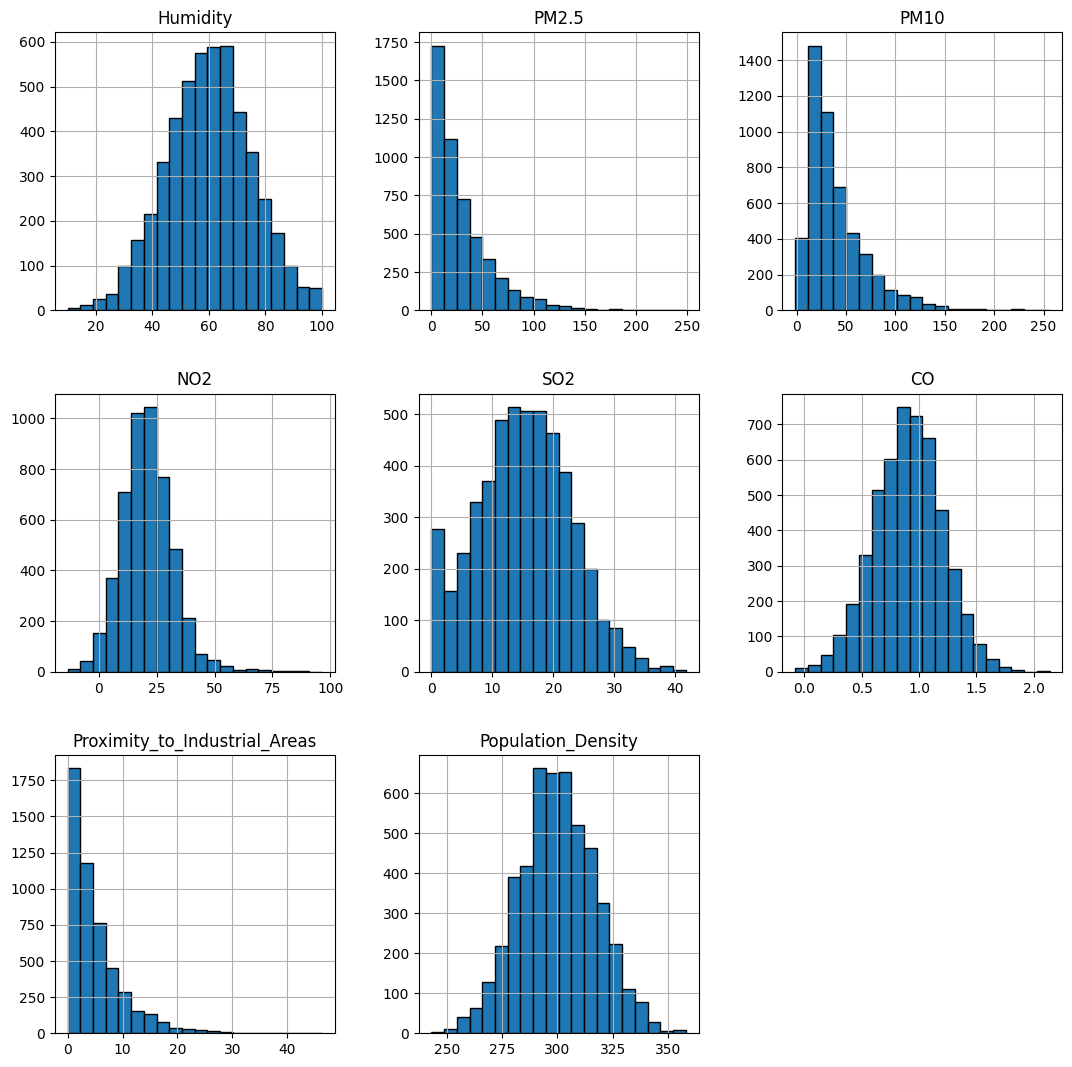

In [3]:
inp = input_data.drop(dframe.columns[0], axis=1)
inp.hist(bins=20, figsize=(13,13), edgecolor = 'black')
plt.show()

На данных гистограммах выбросы присутствуют в половине графиков, теперь обработаем выбросы

In [4]:
print(inp.isnull().sum())

Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
dtype: int64


В данном датасете нет пропущенных значений.
Определим матрицу корреляций для нашего датафрейма

In [5]:
matrix = inp.corr()

def correlation(cf):
    if (abs(cf) >= 0.7):
        return 'Сильная корреляция'
    elif (abs(cf) >= 0.5):
        return 'Средняя корреляция'
    elif (abs(cf) >= 0.3):
        return 'Слабая корреляция'
    else:
        return 'Корреляция отсутствует'

rslt = pd.DataFrame(index=matrix.index, columns=matrix.columns)

for i in range(len(matrix)):
    for k in range(len(matrix)):
        rslt.iloc[i,k] = correlation(matrix.iloc[i,k])

print(rslt)

                                             Humidity                   PM2.5  \
Humidity                           Сильная корреляция  Корреляция отсутствует   
PM2.5                          Корреляция отсутствует      Сильная корреляция   
PM10                           Корреляция отсутствует      Сильная корреляция   
NO2                            Корреляция отсутствует  Корреляция отсутствует   
SO2                            Корреляция отсутствует  Корреляция отсутствует   
CO                             Корреляция отсутствует  Корреляция отсутствует   
Proximity_to_Industrial_Areas  Корреляция отсутствует  Корреляция отсутствует   
Population_Density             Корреляция отсутствует  Корреляция отсутствует   

                                                 PM10                     NO2  \
Humidity                       Корреляция отсутствует  Корреляция отсутствует   
PM2.5                              Сильная корреляция  Корреляция отсутствует   
PM10                       

Как мы можем видеть, в данном датасете корреляции практически нет, выведем все графики, чтобы продемонстрировать отсутствие зависимостей в нашем датасете

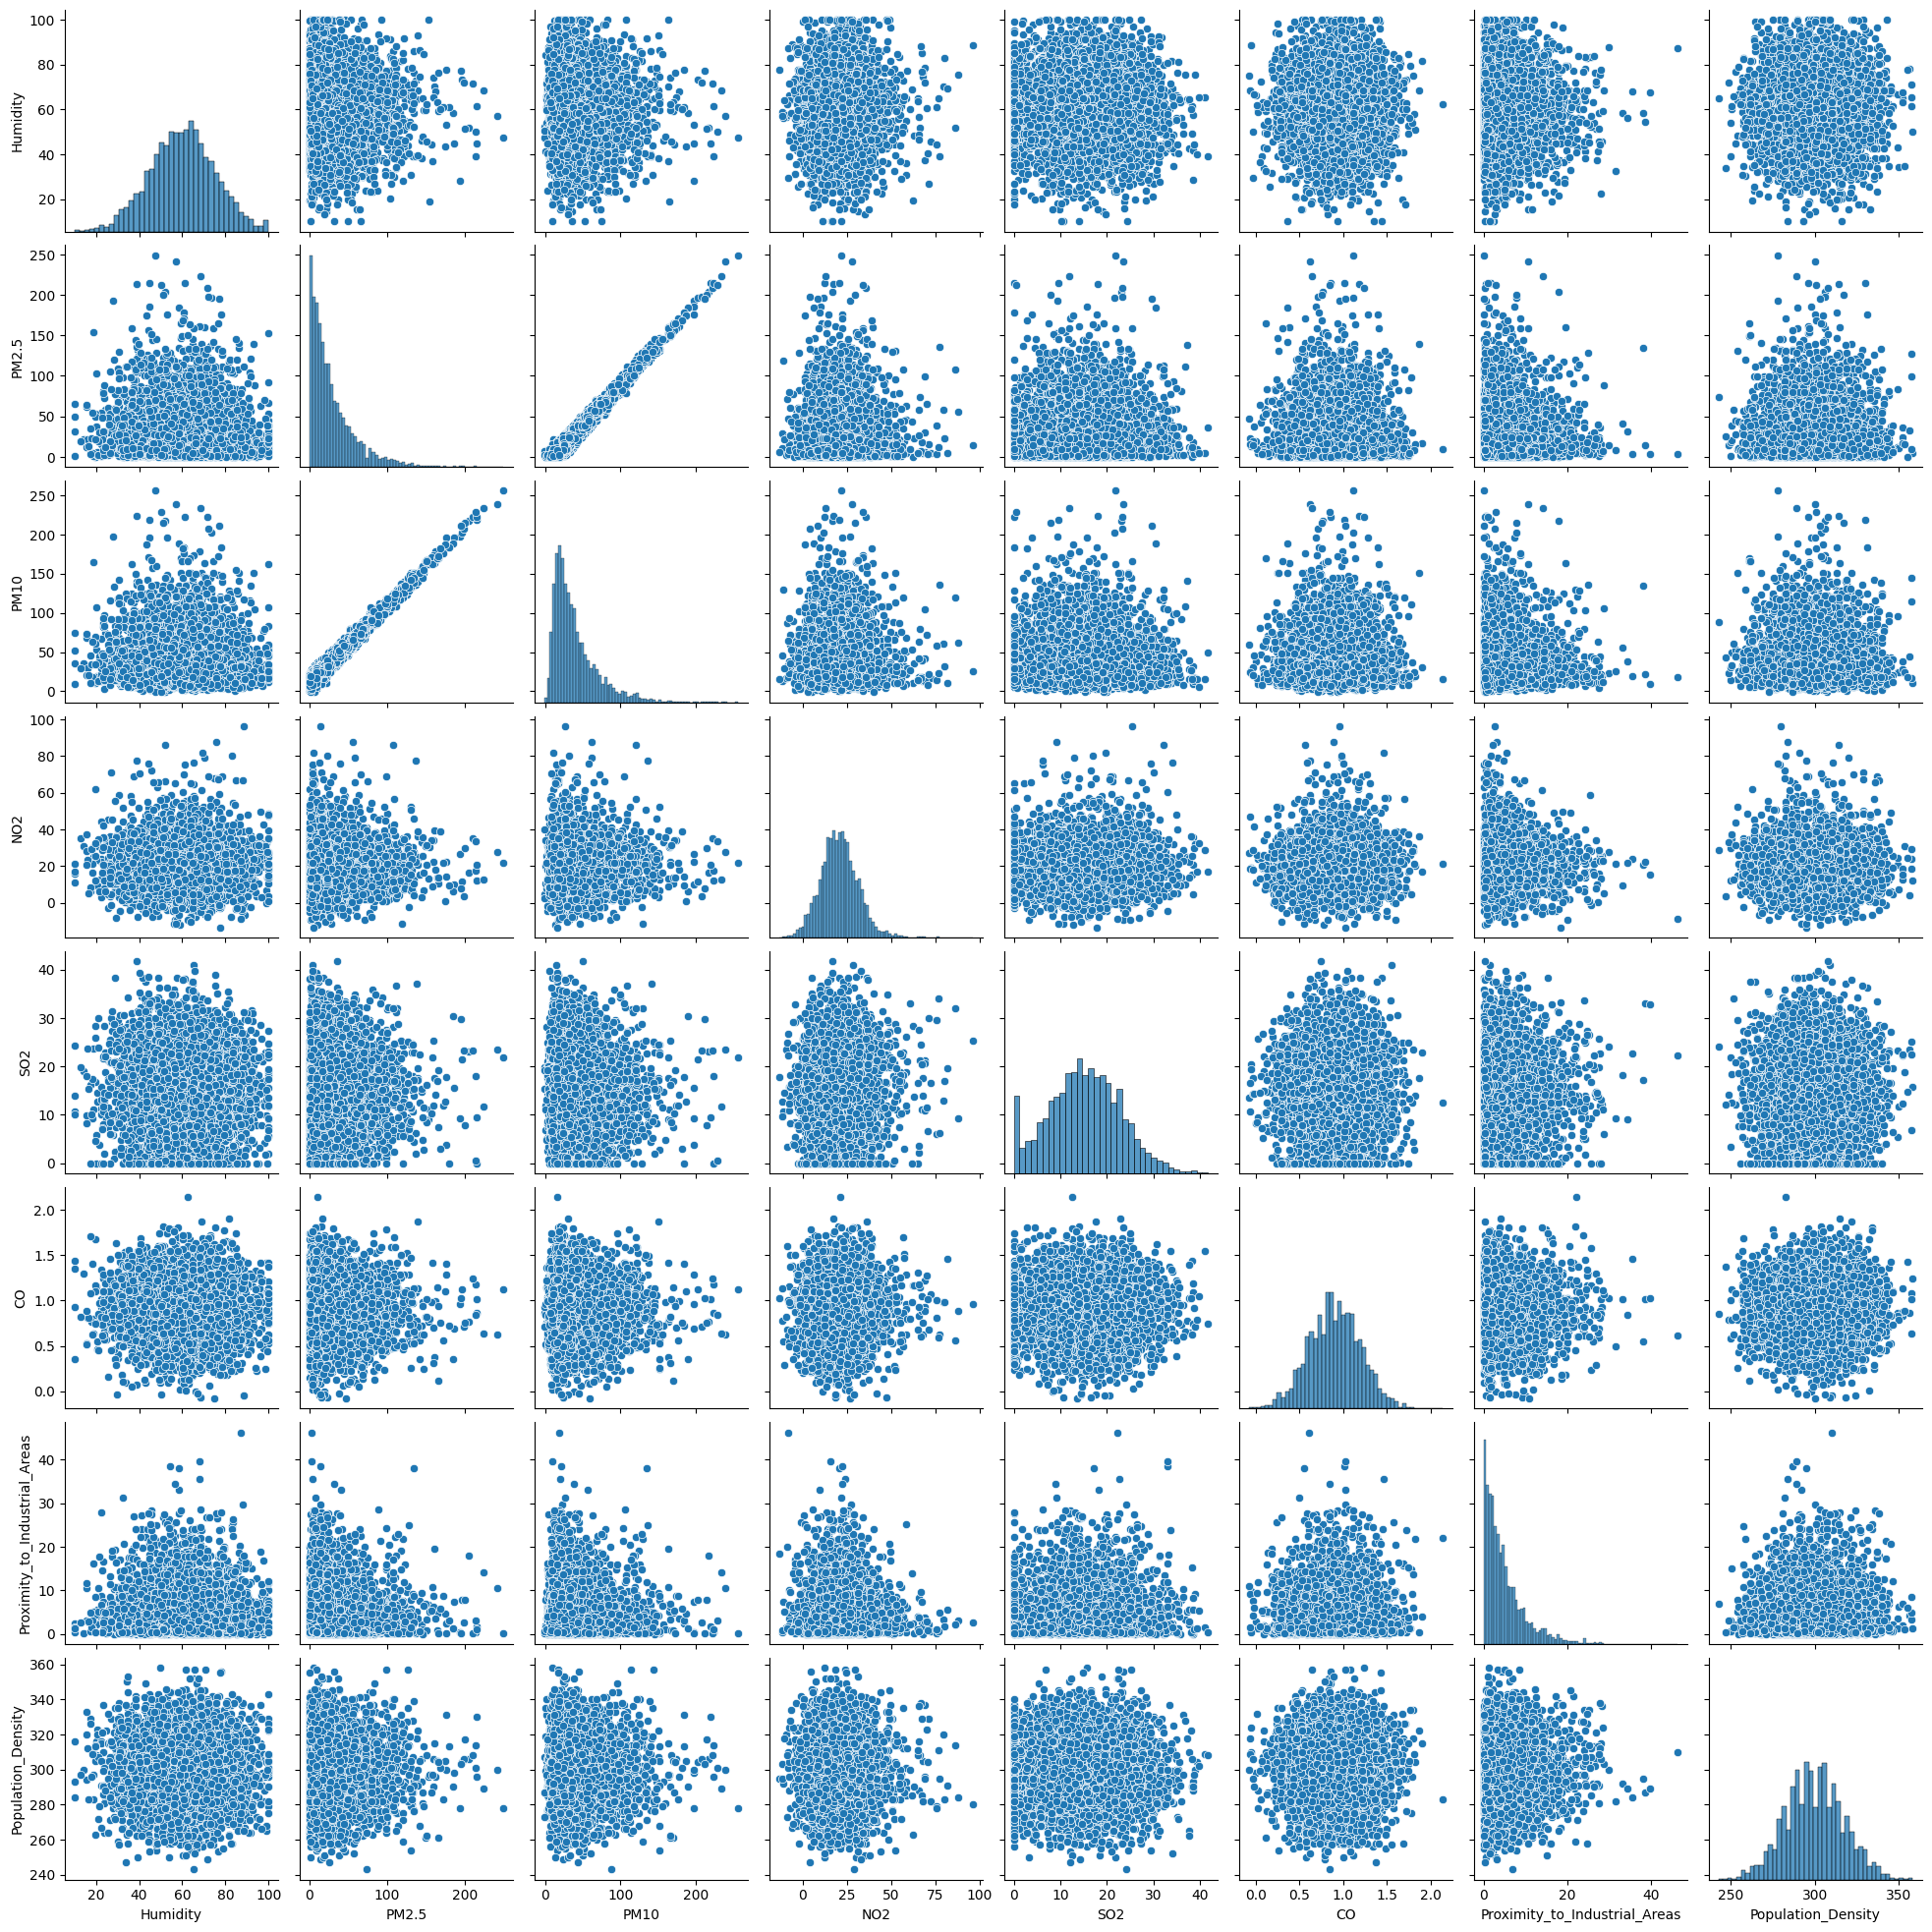

In [6]:
sb.pairplot(inp)
plt.show()

Вывод: На основе анализа датасета можно сделать вывод о том, что в нашем датасете практически отсутствует корреляция, кроме значений PM2.5 и PM10. Все остальные значения абсолютно не имеют зависимостей от других. Также можем упомянуть об очень высокой плотности данных в нашем датасете, что позволит нам в будущем более объективно анализировать данные в этом датасете